In [59]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

In [60]:
# Download front-month futures data
symbols = ['ES=F', 'ZN=F', 'GC=F', 'DX=F']
data = yf.download(symbols)

[*********************100%***********************]  4 of 4 completed


In [72]:
data

Ticker,DX=F,ES=F,GC=F,ZN=F
Date,,,,
2000-06-30,106.580002,NaN,NaN,NaN
2000-07-31,109.370003,NaN,NaN,NaN
2000-08-31,112.570000,NaN,278.299988,NaN
2000-09-30,113.000000,1454.00,273.600006,100.218803
2000-10-31,116.620003,1440.75,264.899994,100.703102
...,...,...,...,...
2024-10-31,103.877998,5738.50,2738.300049,110.468750
2024-11-30,105.828003,6051.50,2657.000000,111.015625
2024-12-31,108.295998,5935.75,2629.199951,108.750000


In [62]:
# Resample data to monthly frequency
data = data['Close'].resample('ME').last()

In [63]:
print(type(data.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [73]:
# Convert index to datetime
data.index = pd.to_datetime(data.index)

In [74]:
data.index

DatetimeIndex(['2000-06-30', '2000-07-31', '2000-08-31', '2000-09-30',
               '2000-10-31', '2000-11-30', '2000-12-31', '2001-01-31',
               '2001-02-28', '2001-03-31',
               ...
               '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31',
               '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31',
               '2025-01-31', '2025-02-28'],
              dtype='datetime64[ns]', name='Date', length=297, freq='ME')

In [66]:
# Clean and Prepare Data
# Subset Adjusted Close Prices
prices = data.fillna(method='ffill')
prices.index = pd.to_datetime(prices.index)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2820\1933067224.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  prices = data.fillna(method='ffill')


In [75]:
print(prices)

Ticker            DX=F     ES=F         GC=F        ZN=F
Date                                                    
2000-06-30  106.580002      NaN          NaN         NaN
2000-07-31  109.370003      NaN          NaN         NaN
2000-08-31  112.570000      NaN   278.299988         NaN
2000-09-30  113.000000  1454.00   273.600006  100.218803
2000-10-31  116.620003  1440.75   264.899994  100.703102
...                ...      ...          ...         ...
2024-10-31  103.877998  5738.50  2738.300049  110.468750
2024-11-30  105.828003  6051.50  2657.000000  111.015625
2024-12-31  108.295998  5935.75  2629.199951  108.750000
2025-01-31  108.217003  6067.25  2812.500000  108.843750
2025-02-28  108.250000  6054.00  2850.300049  108.875000

[297 rows x 4 columns]


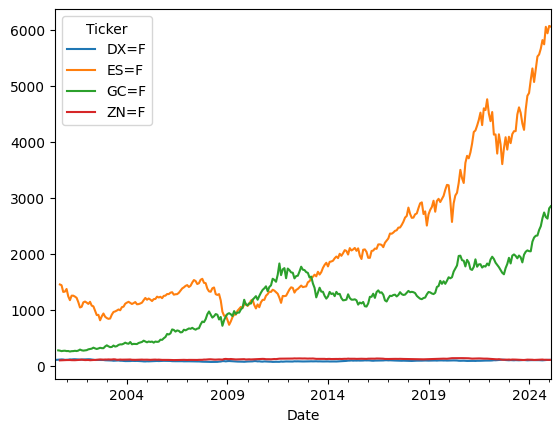

In [76]:
prices.plot()
plt.show()

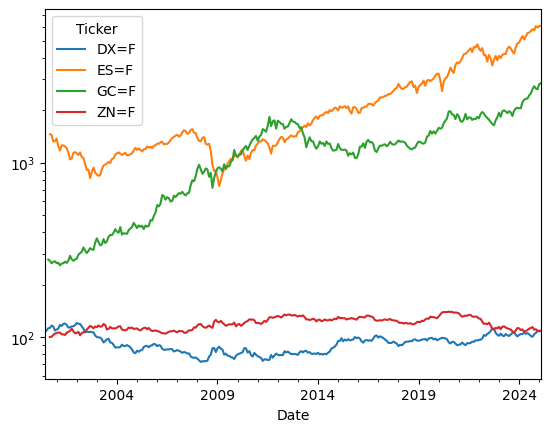

In [77]:
prices.plot()
plt.yscale("log")
plt.show()

In [79]:
# Resample data to monthly frequency
monthly_data = adjusted_close_prices.resample('ME').mean()

In [80]:
monthly_data

Ticker,DX=F,ES=F,GC=F,ZN=F
Date,,,,
2000-06-30,107.180000,NaN,NaN,NaN
2000-07-31,108.050000,NaN,NaN,NaN
2000-08-31,111.046957,NaN,276.099991,NaN
2000-09-30,114.136191,1463.425000,273.389996,100.064739
2000-10-31,115.898181,1403.818182,269.809090,100.848732
...,...,...,...,...
2024-09-30,100.852599,5642.674512,2572.869983,114.574219
2024-10-31,103.122218,5836.532609,2688.904350,112.056386
2024-11-30,105.778600,5955.087500,2649.815015,109.977344


In [48]:
# Calculate Arithmetic Returns
# Compute arithmetic returns
returns = data.pct_change().dropna()
returns.index = pd.to_datetime(returns.index)

In [51]:
returns.index

DatetimeIndex(['2000-10-31', '2000-11-30', '2000-12-31', '2001-01-31',
               '2001-02-28', '2001-03-31', '2001-04-30', '2001-05-31',
               '2001-06-30', '2001-07-31',
               ...
               '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31',
               '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31',
               '2025-01-31', '2025-02-28'],
              dtype='datetime64[ns]', name='Date', length=293, freq='ME')

In [49]:
# Compute Risk-Parity Weights
def compute_risk_parity_weights(returns, window_size=36):
    # Compute volatility known at time t
    rolling_vol = returns.rolling(window=window_size).std() * np.sqrt(12)  # Annualized volatility
    rolling_inverse_vol = 1 / rolling_vol

     # Divide inverse volatility by the sum of inverse volatilities
    risk_parity_weights = rolling_inverse_vol.div(rolling_inverse_vol.sum(axis=1), axis=0)
    
    # Shift weights by one period to use only information available at time t
    risk_parity_weights = risk_parity_weights.shift(1)
    
    return risk_parity_weights

risk_parity_weights = compute_risk_parity_weights(returns, 36)

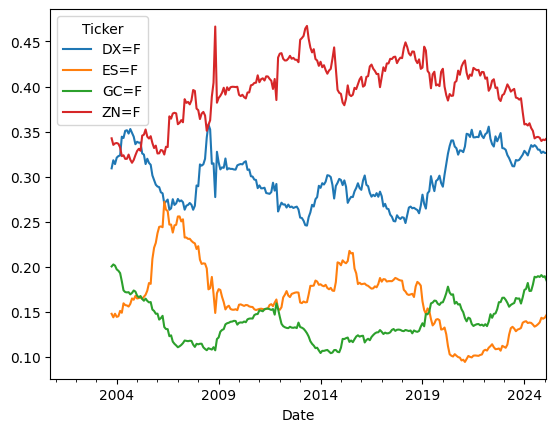

In [52]:
risk_parity_weights.plot()
plt.show()

In [53]:
# Calculate weighted returns
weighted_returns = returns * risk_parity_weights
weighted_returns = weighted_returns.dropna()
risk_parity_portfolio_returns = weighted_returns.sum(axis=1)

In [54]:
print(risk_parity_portfolio_returns)

Date
2003-10-31   -0.000232
2003-11-30   -0.000968
2003-12-31    0.006040
2004-01-31    0.000244
2004-02-29    0.004789
                ...   
2024-10-31    0.005083
2024-11-30    0.009963
2024-12-31   -0.004015
2025-01-31    0.016452
2025-02-28    0.003991
Freq: ME, Length: 257, dtype: float64


In [55]:
# 8. Evaluate Portfolio Performance
# Compute basic metrics
annual_mean_return = risk_parity_portfolio_returns.mean() * 12
annual_volatility = risk_parity_portfolio_returns.std() * np.sqrt(12)
skewness = risk_parity_portfolio_returns.skew()
kurtosis = risk_parity_portfolio_returns.kurtosis()

# Compute drawdown
cumulative_returns = (1 + risk_parity_portfolio_returns).cumprod()
running_max = cumulative_returns.cummax()
drawdown = (cumulative_returns / running_max) - 1
max_drawdown = drawdown.min()

# Compute Sharpe ratio (assuming risk-free rate = 0)
sharpe_ratio = annual_mean_return / annual_volatility

# Compute Sortino ratio
downside_returns = risk_parity_portfolio_returns.copy()
downside_returns[downside_returns > 0] = 0
downside_std = downside_returns.std() * np.sqrt(12)
sortino_ratio = annual_mean_return / downside_std

# Compute Calmar ratio
calmar_ratio = annual_mean_return / abs(max_drawdown)

In [56]:
# Display results
print(f"Mean Annual Return: {annual_mean_return:.4f}")
print(f"Annual Volatility: {annual_volatility:.4f}")
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")
print(f"Maximum Drawdown: {max_drawdown:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Sortino Ratio: {sortino_ratio:.4f}")
print(f"Calmar Ratio: {calmar_ratio:.4f}")

Mean Annual Return: 0.0340
Annual Volatility: 0.0359
Skewness: 0.2112
Kurtosis: 1.0693
Maximum Drawdown: -0.0496
Sharpe Ratio: 0.9465
Sortino Ratio: 1.9643
Calmar Ratio: 0.6848


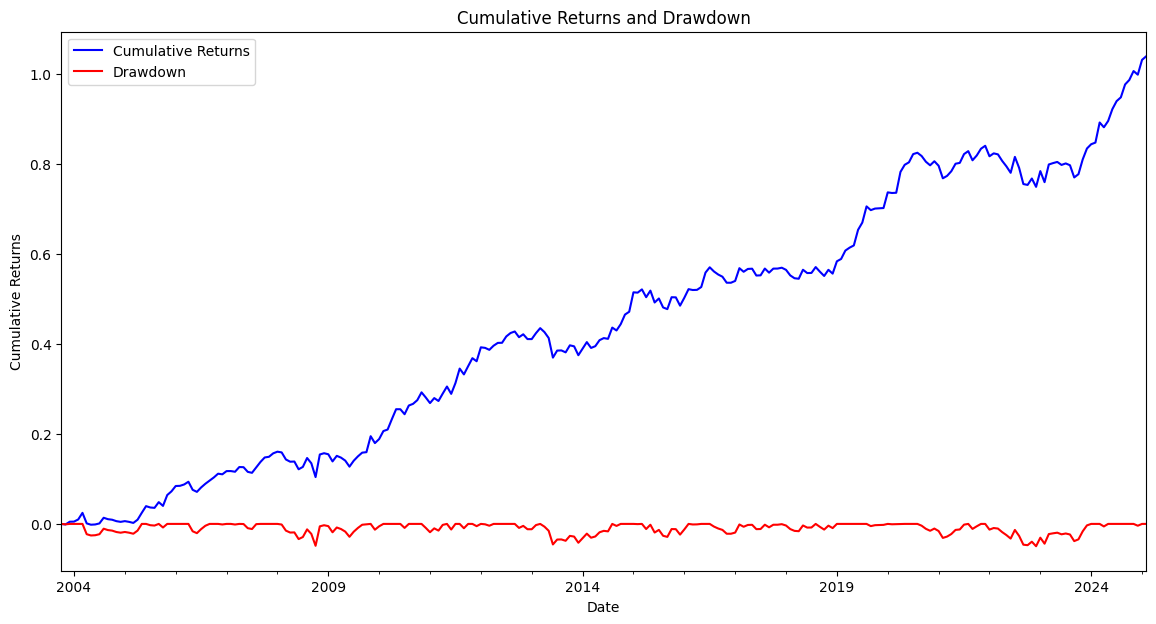

In [57]:
# Plot portfolio performance
fig, ax = plt.subplots(figsize=(14, 7))
(cumulative_returns - 1).plot(ax=ax, label='Cumulative Returns', color='blue')
drawdown.plot(ax=ax, label='Drawdown', color='red')
ax.set_title('Cumulative Returns and Drawdown')
ax.set_ylabel('Cumulative Returns')
ax.set_xlabel('Date')
ax.legend()
plt.show()